<a href="https://colab.research.google.com/github/jeguns/EP7173/blob/main/Unidad%2003/03_Tratamiento_de_valores_perdidos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Paquetes

In [1]:
pip install rpy2 &> /dev/null

In [2]:
pip install pandas==1.5.3 &> /dev/null

In [3]:
pip install fancyimpute &> /dev/null

### Lectura de datos

Los datos corresponden a la Encuesta Nacional de Hogares del año 2022, en específico de los hogares de la Costa Norte. Seleccionaremos solo algunas columnas de interés:

- RESULT: Resultado Final de la Encuesta
1. Completa
2. Incompleta
3. Rechazo
4. Ausente
5. Vivienda Desocupada
6. No se Inició la Entrevista
7. Otro

- P24A: Las paredes exteriores de la vivienda tienen fachada: Con tarrajeo
1. Total
2. Parcial
3. No está tarrajeada
4. No corresponde

- P24B: Las paredes exteriores de la vivienda tienen fachada:
1. Totalmente
2. Parcialmente
3. Sin pintar

- P101: Tipo de vivienda
1. Casa independiente
2. Departamento en edificio
3. Vivienda en quinta
4. Vivienda en casa de vecindad(callejón solar o corralón)
5. Choza o cabaña
6. Vivienda improvisada
7. Local no destinado para habitación humana
8. Otro

- P102: El material predominante en las paredes exteriores es:
1. Ladrillo o bloque de cemento
2. Piedra o sillar con cal o cemento
3. Adobe
4. Tapia
5. Quincha (caña con barro)
6. Piedra con barro
7. Madera (pona, tornillo, etc)
8. Triplay/calamina/estera
9. Otro material

- P104: ¿Cuántas habitaciones en total tiene la vivienda, sin contar el baño,la cocina, los pasadizos, ni el garage?

- P105A: La vivienda que ocupa su hogar es:
1. Alquilada
2. Propia, totalmente pagada
3. Propia, por invasión
4. Propia, comprándola a plazos
5. Cedida por el centro de trabajo
6. Cedida por otro hogar o institución
7. Otra forma

- P106: ¿Cuánto cree que le pagarían de alquiler mensual (en S/.) ?

- D106: (Deflactado, mensualizado) ¿Cuánto cree que le pagarían de alquiler mensual?

- I106: (Imputado, deflactado, mensualizado) ¿Cuánto cree que le pagarían de alquiler mensual?

In [4]:
import pandas as pd

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
df_0 = pd.read_csv('03 - enaho1_costanorte.csv',encoding='latin-1', na_values = [99999,999999,'99999','999999',' ','  ','   '])
df_0.head()

,AÃO,MES,CONGLOME,VIVIENDA,HOGAR,UBIGEO,DOMINIO,ESTRATO,PERIODO,TIPENC,FECENT,RESULT,PANEL,P22,P23,P24A,P24B,P25$1,P25$2,P25$3,P25$4,P25$5,P101,P102,P103,P103A,P104,P104A,P104B1,P104B2,P105A,P105B,P106,P106A,P106B,P107B1,P107C11,P107C12,P107C13,P107C14,P107C16,P107C17,P107C18,P107C19,P107C110,P107D1,P107B2,P107C21,P107C22,P107C23,P107C24,P107C26,P107C27,P107C28,P107C29,P107C210,P107D2,P107B3,P107C31,P107C32,P107C33,P107C34,P107C36,P107C37,P107C38,P107C39,P107C310,P107D3,P107B4,P107C41,P107C42,P107C43,P107C44,P107C46,P107C47,P107C48,P107C49,P107C410,P107D4,P107E,P110,P110A1,P110A,P110A_MODIFICADA,P110C,P110C1,P110C2,P110C3,P110D,P110E,P110F,P110G,P111A,P1121,P1123,P1124,P1125,P1126,P1127,P112A,P1131,P1132,P1133,P1135,P1136,P1139,P1137,P1138,P113A,P1141,P1142,P1143,P1144,P1145,P1171$01,P1171$02,P1171$04,P1171$05,P1171$06,P1171$07,P1171$08,P1171$09,P1171$10,P1171$11,P1171$12,P1171$13,P1171$14,P1171$15,P1171$16,P1172$01,P1172$02,P1172$04,P1172$05,P1172$06,P1172$07,P1172$08,P1172$09,P1172$10,P1172$11,P1172$12,P1172$13,P1172$14,P1172$15,P1172$16,P1173$01,P1173$02,P1173$04,P1173$05,P1173$06,P1173$07,P1173$08,P1173$09,P1173$10,P1173$11,P1173$12,P1173$13,P1173$14,P1173$15,P1173$16,P1174$01,P1174$02,P1174$04,P1174$05,P1174$06,P1174$07,P1174$08,P1174$09,P1174$10,P1174$11,P1174$12,P1174$13,P1174$14,P1174$15,P1174$16,P1175$01,P1175$02,P1175$04,P1175$05,P1175$06,P1175$07,P1175$08,P1175$09,P1175$10,P1175$11,P1175$12,P1175$13,P1175$14,P1175$15,P1175$16,P117T2,P117T3,P117T4,T110,P200I,P600I,P600D1,P600M1,P600A1,P600D2,P600M2,P600A2,P612I1,P612I11,P612I2,P612I22,P700I,P710I,P800I,P110I,TICUEST01,D105B,D106,D107D1,D107D2,D107D3,D107D4,D1172$01,D1173$01,D1174$01,D1172$02,D1173$02,D1174$02,D1172$04,D1173$04,D1174$04,D1172$05,D1173$05,D1174$05,D1172$06,D1173$06,D1174$06,D1172$07,D1173$07,D1174$07,D1172$08,D1173$08,D1174$08,D1172$09,D1173$09,D1174$09,D1172$10,D1173$10,D1174$10,D1172$15,D1173$15,D1174$15,D1172$16,D1173$16,D1174$16,D612I11,D1172$11,D1173$11,D1174$11,D1172$12,D1173$12,D1174$12,D1172$13,D1173$13,D1174$13,D1172$14,D1173$14,D1174$14,D612I22,I105B,I106,I1172$01,I1172$02,I1172$04,I1172$05,I1172$06,I1172$07,I1172$08,I1172$09,I1172$10,I1172$11,I1172$12,I1172$13,I1172$14,I1172$15,I1172$16,I1173$01,I1174$01,I1173$02,I1174$02,I1173$04,I1174$04,I1173$05,I1174$05,I1173$06,I1174$06,I1173$07,I1174$07,I1173$08,I1174$08,I1173$09,I1174$09,I1173$10,I1174$10,I1173$11,I1174$11,I1173$12,I1174$12,I1173$13,I1174$13,I1173$14,I1174$14,I1173$15,I1174$15,I1173$16,I1174$16,T111A,NBI1,NBI2,NBI3,NBI4,NBI5,FACTOR07,NCONGLOME,SUB_CONGLOME,CODCCPP,NOMCCPP,LONGITUD,LATITUD,ALTITUD
0,2022,9,7092,17,11,130105,1,1,3,3,20221001,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,525.586853,10288,0,1,SECTOR SANTA VERONICA,-79.0494,-8.078468,74.0
1,2022,9,7092,50,11,130105,1,1,3,3,20220918,1,1.0,2.0,NaN,3.0,3.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,2.0,1.0,3.0,2.0,2.0,2

### Preprocesamiento

In [8]:
df_1 = df_0[((df_0['RESULT'] == 1) | (df_0['RESULT'] == 2)) & (df_0['P105A'] != 1)][['P24A','P24B','P101','P102','P104','P105A','P106','D106','I106']].reset_index(drop = True)
df_1.head()

,P24A,P24B,P101,P102,P104,P105A,P106,D106,I106
0,3.0,3.0,1.0,1.0,3.0,6.0,400.0,4747.0,4747.0
1,3.0,2.0,1.0,3.0,2.0,2.0,500.0,5934.0,5934.0
2,2.0,2.0,1.0,3.0,5.0,2.0,800.0,9474.0,9474.0
3,2.0,2.0,1.0,1.0,3.0,2.0,500.0,5934.0,5934.0
4,1.0,1.0,1.0,1.0,4.0,2.0,700.0,8540.0,8540.0


In [9]:
nuevos_nombres = {'P24A':'PARED_TARRAJEO', 'P24B':'PARED_PINTURA',
                  'P101':'TIPO_VIVIENDA', 'P102': 'MATERIAL_PARED',
                  'P104':'NUMHAB', 'P105A': 'VIVIENDA',
                  'P106':'VALOR_ALQ', 'D106':'VALOR_ALQ_DEF','I106':'VALOR_ALQ_DEF_IMP'}
df_1.rename(columns=nuevos_nombres, inplace=True)
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4512 entries, 0 to 4511
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PARED_TARRAJEO     4512 non-null   float64
 1   PARED_PINTURA      4512 non-null   float64
 2   TIPO_VIVIENDA      4420 non-null   float64
 3   MATERIAL_PARED     4420 non-null   float64
 4   NUMHAB             4420 non-null   float64
 5   VIVIENDA           4512 non-null   float64
 6   VALOR_ALQ          4456 non-null   float64
 7   VALOR_ALQ_DEF      4456 non-null   float64
 8   VALOR_ALQ_DEF_IMP  4512 non-null   float64
dtypes: float64(9)
memory usage: 317.4 KB


### Identificación de valores perdidos



#### Exploración

In [10]:
df_1.isnull().sum()

,0
PARED_TARRAJEO,0
PARED_PINTURA,0
TIPO_VIVIENDA,92
MATERIAL_PARED,92
NUMHAB,92
VIVIENDA,0
VALOR_ALQ,56
VALOR_ALQ_DEF,56
VALOR_ALQ_DEF_IMP,0


In [11]:
col_str = ['PARED_TARRAJEO', 'PARED_PINTURA', 'TIPO_VIVIENDA', 'MATERIAL_PARED','VIVIENDA']
df_1[col_str] = df_1[col_str].astype(str)
df_1.head(20)

,PARED_TARRAJEO,PARED_PINTURA,TIPO_VIVIENDA,MATERIAL_PARED,NUMHAB,VIVIENDA,VALOR_ALQ,VALOR_ALQ_DEF,VALOR_ALQ_DEF_IMP
0,3.0,3.0,1.0,1.0,3.0,6.0,400.0,4747.0,4747.0
1,3.0,2.0,1.0,3.0,2.0,2.0,500.0,5934.0,5934.0
2,2.0,2.0,1.0,3.0,5.0,2.0,800.0,9474.0,9474.0
3,2.0,2.0,1.0,1.0,3.0,2.0,500.0,5934.0,5934.0
4,1.0,1.0,1.0,1.0,4.0,2.0,700.0,8540.0,8540.0
5,1.0,1.0,1.0,3.0,4.0,6.0,500.0,6100.0,6100.0
6,1.0,1.0,1.0,1.0,5.0,2.0,1000.0,12200.0,12200.0
7,2.0,3.0,1.0,1.0,2.0,2.0,500.0,6100.0,6100.0
8,1.0,2.0,1.0,1.0,7.0,2.0,300.0,3660.0,3660.0
9,1.0,1.0,1.0,1.0,7.0,2.0,300.0,3635.0,3635.0


In [12]:
df_1.isnull().sum()

,0
PARED_TARRAJEO,0
PARED_PINTURA,0
TIPO_VIVIENDA,0
MATERIAL_PARED,0
NUMHAB,92
VIVIENDA,0
VALOR_ALQ,56
VALOR_ALQ_DEF,56
VALOR_ALQ_DEF_IMP,0


In [13]:
import numpy as np
df_1 = df_1.replace(['nan', 'null'], np.nan) #np.nan ==== NaN

In [14]:
df_1.isnull().sum()

,0
PARED_TARRAJEO,0
PARED_PINTURA,0
TIPO_VIVIENDA,92
MATERIAL_PARED,92
NUMHAB,92
VIVIENDA,0
VALOR_ALQ,56
VALOR_ALQ_DEF,56
VALOR_ALQ_DEF_IMP,0


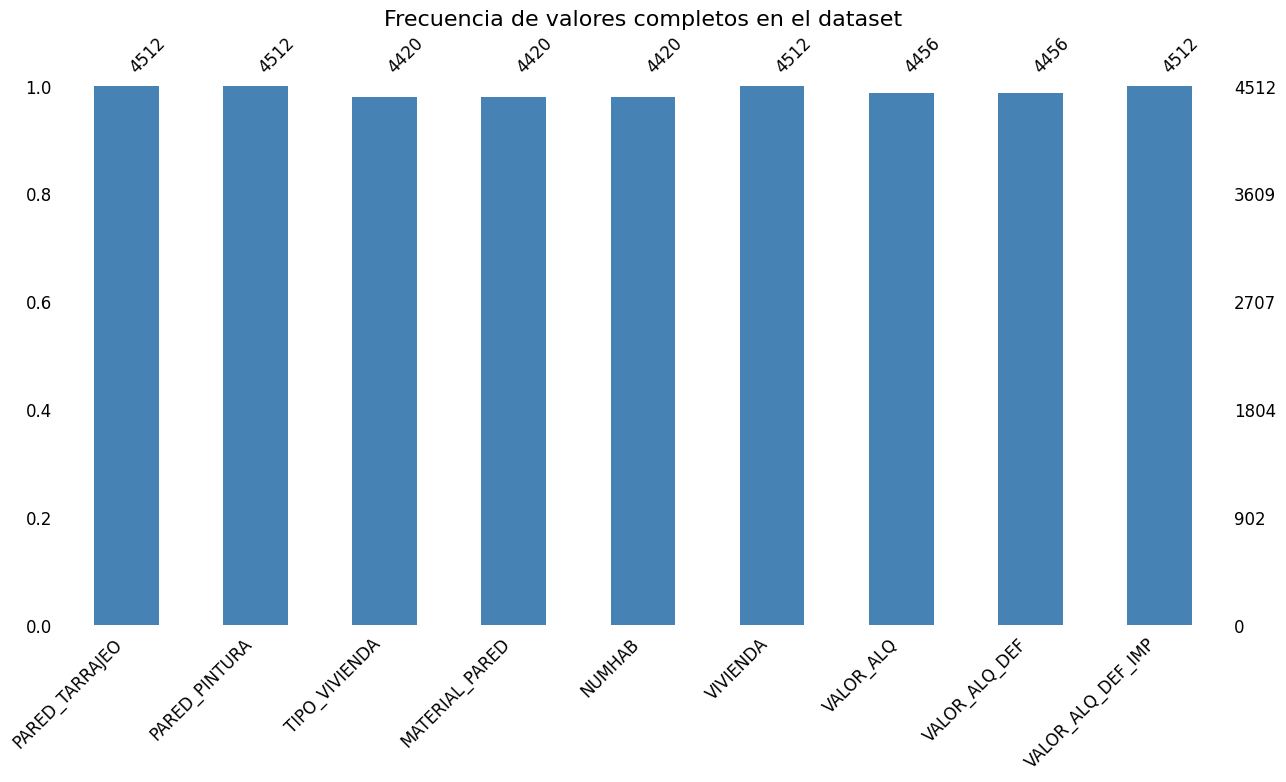

In [15]:
import missingno as msno
import matplotlib.pyplot as plt
msno.bar(df_1, figsize=(15,7), fontsize=12, color='steelblue')
plt.title('Frecuencia de valores completos en el dataset', fontsize=16)
plt.show()

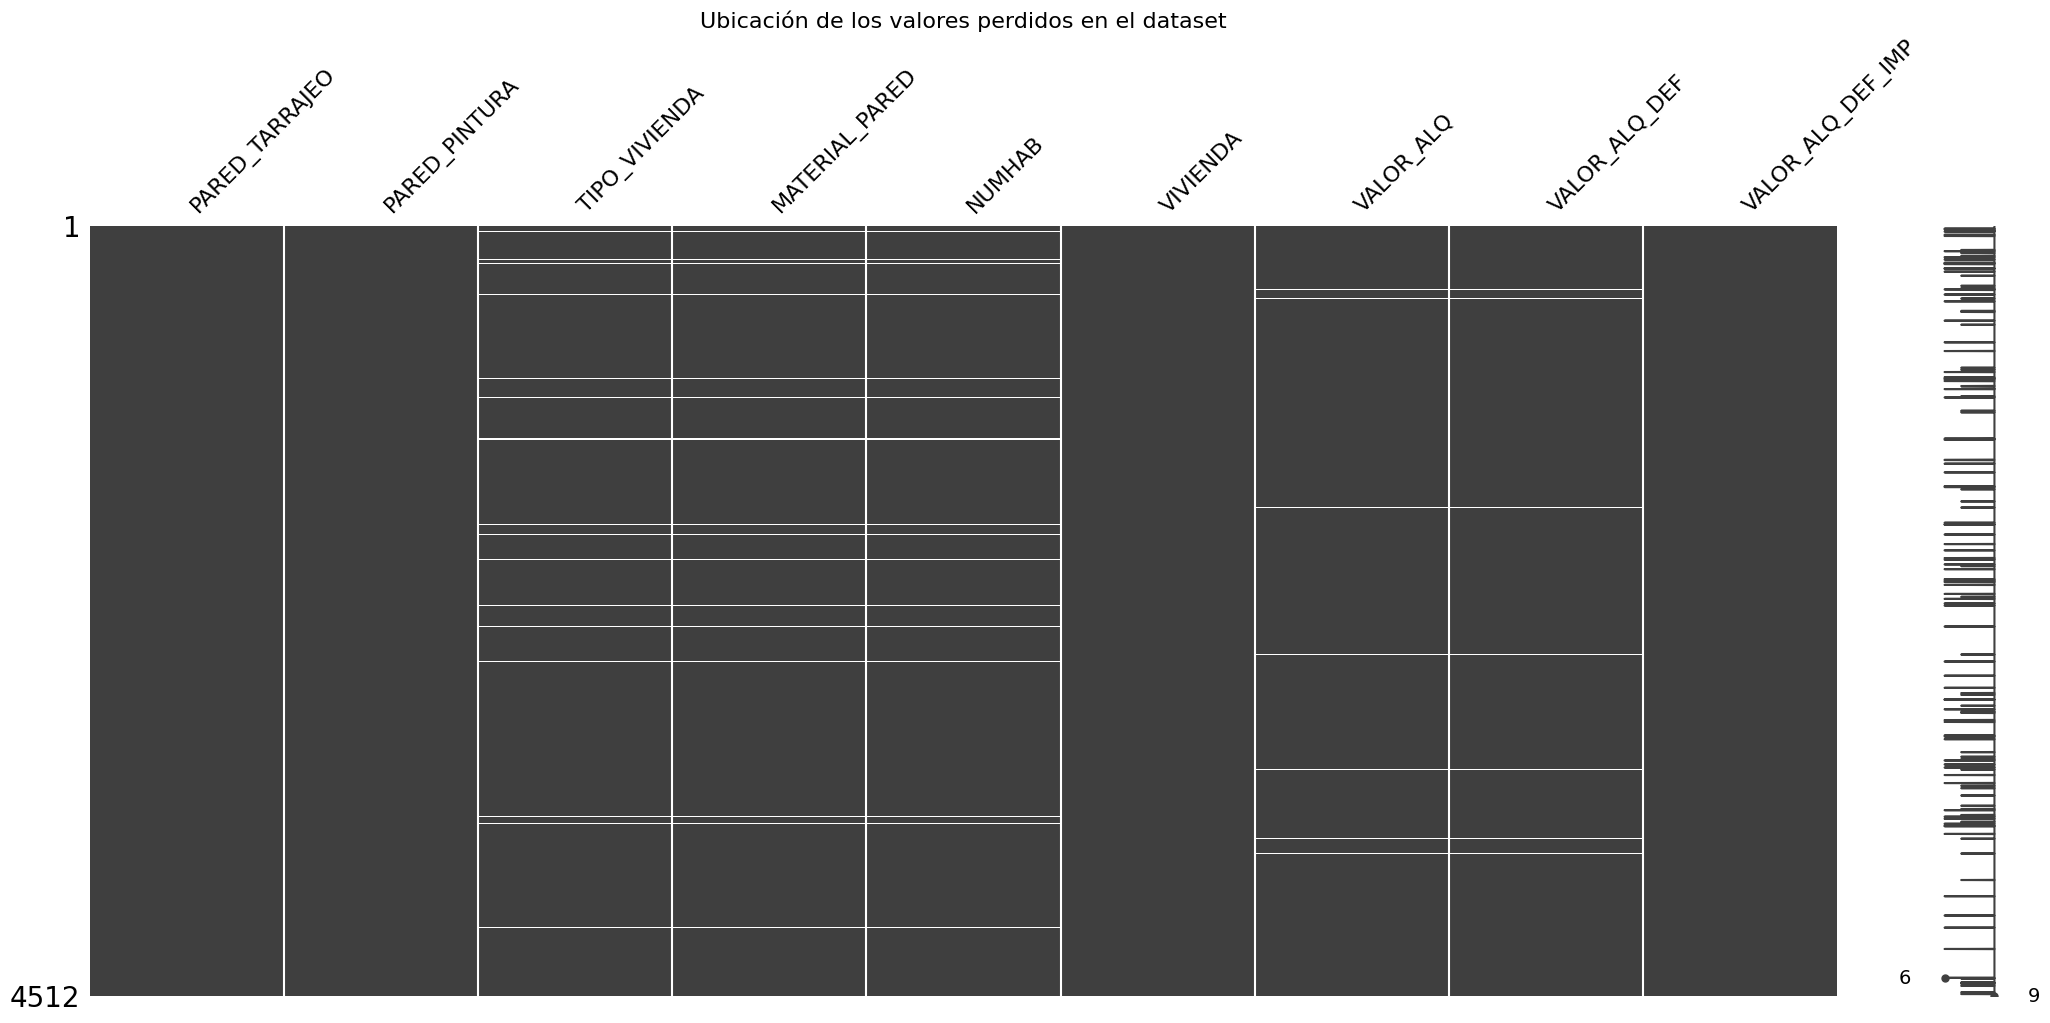

In [16]:
msno.matrix(df_1) # permite ver los missings como espacios en blanco
plt.title('Ubicación de los valores perdidos en el dataset', fontsize=16)
plt.show()

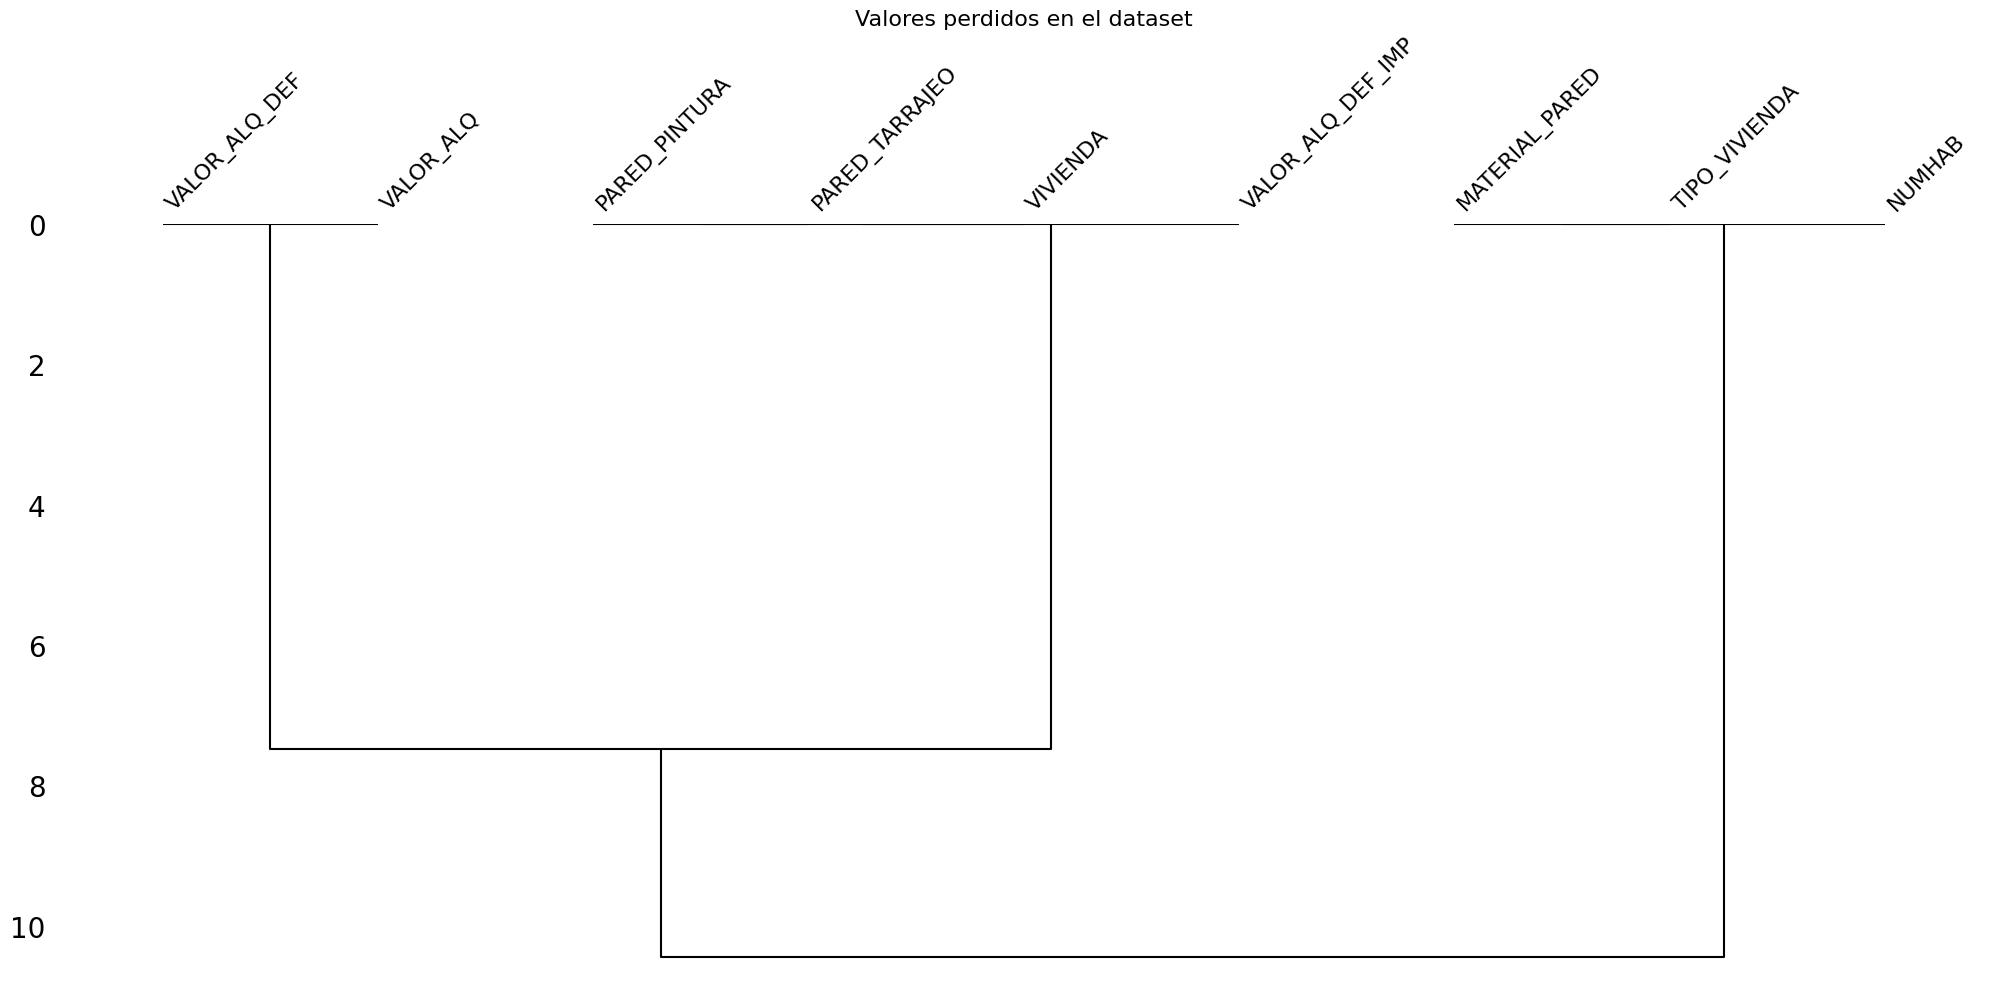

In [17]:
msno.dendrogram(df_1)
plt.title('Valores perdidos en el dataset', fontsize=16)
plt.show()

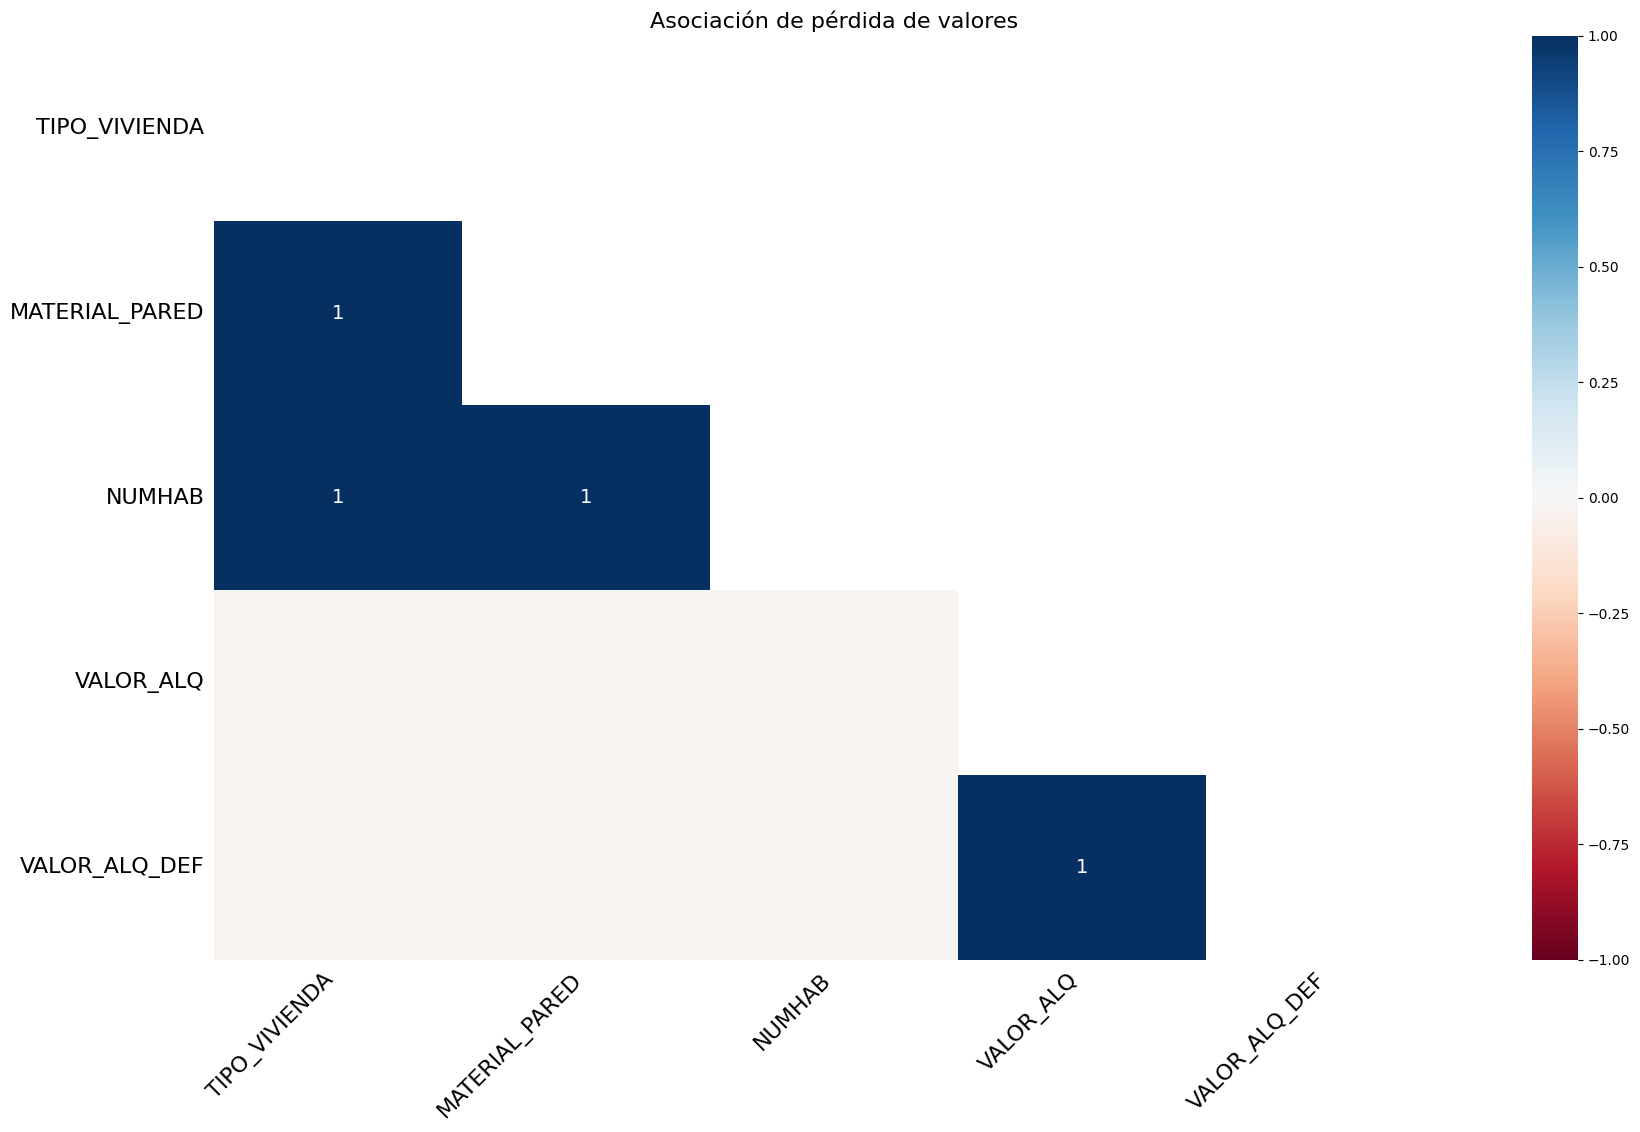

In [18]:
msno.heatmap(df_1)
plt.title('Asociación de pérdida de valores', fontsize=16)
plt.show()

In [19]:
%load_ext rpy2.ipython

In [20]:
%R -i df_1

/usr/local/lib/python3.10/dist-packages/rpy2/robjects/pandas2ri.py:55: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():


In [21]:
%R df_1 |> head()

,PARED_TARRAJEO,PARED_PINTURA,TIPO_VIVIENDA,MATERIAL_PARED,NUMHAB,VIVIENDA,VALOR_ALQ,VALOR_ALQ_DEF,VALOR_ALQ_DEF_IMP
0,3.0,3.0,1.0,1.0,3.0,6.0,400.0,4747.0,4747.0
1,3.0,2.0,1.0,3.0,2.0,2.0,500.0,5934.0,5934.0
2,2.0,2.0,1.0,3.0,5.0,2.0,800.0,9474.0,9474.0
3,2.0,2.0,1.0,1.0,3.0,2.0,500.0,5934.0,5934.0
4,1.0,1.0,1.0,1.0,4.0,2.0,700.0,8540.0,8540.0
5,1.0,1.0,1.0,3.0,4.0,6.0,500.0,6100.0,6100.0


In [ ]:
%R install.packages("naniar")

Attaching package: ‘dplyr’



    filter, lag



    intersect, setdiff, setequal, union




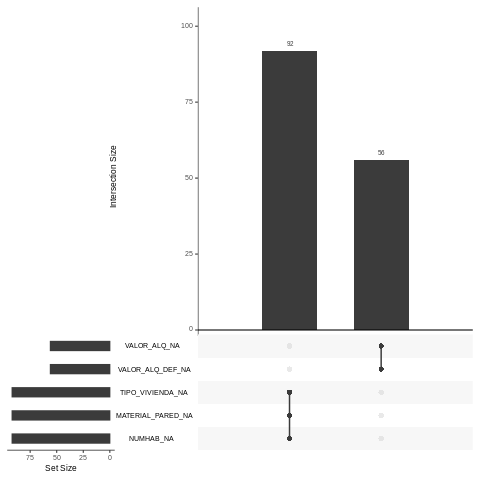

In [23]:
%%R
library(naniar)
library(dplyr)
df_1 |> gg_miss_upset()

#### Mecanismos

In [24]:
df_1[df_1['NUMHAB'].isnull()].describe(include=['object']), df_1[df_1['NUMHAB'].notnull()].describe(include=['object'])

(       PARED_TARRAJEO PARED_PINTURA TIPO_VIVIENDA MATERIAL_PARED VIVIENDA
 count              92            92             0              0       92
 unique              4             3             0              0        2
 top               1.0           1.0           NaN            NaN      6.0
 freq               62            60           NaN            NaN       83,
        PARED_TARRAJEO PARED_PINTURA TIPO_VIVIENDA MATERIAL_PARED VIVIENDA
 count            4420          4420          4420           4420     4420
 unique              4             3             4              9        6
 top               1.0           1.0           1.0            1.0      2.0
 freq             2714          2604          4286           2616     3197)

In [25]:
df_1[df_1['NUMHAB'].isnull()].describe(include=['number']), df_1[df_1['NUMHAB'].notnull()].describe(include=['number'])

(       NUMHAB    VALOR_ALQ  VALOR_ALQ_DEF  VALOR_ALQ_DEF_IMP
 count     0.0    92.000000      92.000000          92.000000
 mean      NaN   298.858696    3589.880435        3589.880435
 std       NaN   189.750130    2279.093929        2279.093929
 min       NaN    28.000000     339.000000         339.000000
 25%       NaN   173.000000    2107.000000        2107.000000
 50%       NaN   250.000000    2973.500000        2973.500000
 75%       NaN   400.000000    4741.000000        4741.000000
 max       NaN  1157.000000   13749.000000       13749.000000,
             NUMHAB    VALOR_ALQ  VALOR_ALQ_DEF  VALOR_ALQ_DEF_IMP
 count  4420.000000  4364.000000    4364.000000        4420.000000
 mean      3.708597   396.381072    4767.554308        4761.083145
 std       1.492432   452.922254    5453.867848        5428.145004
 min       1.000000     9.000000     106.000000         106.000000
 25%       3.000000   150.000000    1785.000000        1785.000000
 50%       4.000000   288.000000    346

In [26]:
df_1[df_1['VALOR_ALQ_DEF'].isnull()].describe(include=['object']), df_1[df_1['VALOR_ALQ_DEF'].notnull()].describe(include=['object'])

(       PARED_TARRAJEO PARED_PINTURA TIPO_VIVIENDA MATERIAL_PARED VIVIENDA
 count              56            56            56             56       56
 unique              4             3             2              5        4
 top               1.0           1.0           1.0            1.0      2.0
 freq               41            43            55             44       40,
        PARED_TARRAJEO PARED_PINTURA TIPO_VIVIENDA MATERIAL_PARED VIVIENDA
 count            4456          4456          4364           4364     4456
 unique              4             3             4              9        6
 top               1.0           1.0           1.0            1.0      2.0
 freq             2735          2621          4231           2572     3166)

In [27]:
df_1[df_1['VALOR_ALQ_DEF'].isnull()].describe(include=['number']),df_1[df_1['VALOR_ALQ_DEF'].notnull()].describe(include=['number'])

(          NUMHAB  VALOR_ALQ  VALOR_ALQ_DEF  VALOR_ALQ_DEF_IMP
 count  56.000000        0.0            0.0          56.000000
 mean    4.571429        NaN            NaN        4256.794643
 std     2.147787        NaN            NaN        2744.672926
 min     1.000000        NaN            NaN         771.500000
 25%     3.000000        NaN            NaN        2372.500000
 50%     4.000000        NaN            NaN        3564.000000
 75%     5.000000        NaN            NaN        5822.000000
 max    12.000000        NaN            NaN        9694.000000,
             NUMHAB    VALOR_ALQ  VALOR_ALQ_DEF  VALOR_ALQ_DEF_IMP
 count  4364.000000  4456.000000    4456.000000        4456.000000
 mean      3.697525   394.367594    4743.239677        4743.239677
 std       1.479227   449.255014    5409.673657        5409.673657
 min       1.000000     9.000000     106.000000         106.000000
 25%       3.000000   150.000000    1785.000000        1785.000000
 50%       4.000000   288.0000

In [28]:
%%R
table(as_shadow(df_1)$NUMHAB_NA, df_1$VIVIENDA)

     
       2.0  3.0  4.0  5.0  6.0  7.0
  !NA 3197  666   24    6  525    2
  NA     9    0    0    0   83    0


In [33]:
# H0: Independencia
# H1: Asociación
%%R
table(as_shadow(df_1)$NUMHAB_NA, df_1$VIVIENDA) |> chisq.test()


	Pearson's Chi-squared test

data:  table(as_shadow(df_1)$NUMHAB_NA, df_1$VIVIENDA)
X-squared = 474.61, df = 5, p-value < 2.2e-16



In [34]:
%%R
table(as_shadow(df_1)$VALOR_ALQ_DEF_NA, df_1$VIVIENDA)

     
       2.0  3.0  4.0  5.0  6.0  7.0
  !NA 3166  658   22    6  602    2
  NA    40    8    2    0    6    0


In [35]:
%%R
table(as_shadow(df_1)$VALOR_ALQ_DEF_NA, df_1$VIVIENDA) |> chisq.test()


	Pearson's Chi-squared test

data:  table(as_shadow(df_1)$VALOR_ALQ_DEF_NA, df_1$VIVIENDA)
X-squared = 10.28, df = 5, p-value = 0.06769



In [36]:
%%R
table(as_shadow(df_1)$VALOR_ALQ_DEF_NA, df_1$PARED_TARRAJEO)

     
       1.0  2.0  3.0  4.0
  !NA 2735  276 1124  321
  NA    41    3   11    1


In [37]:
%%R
table(as_shadow(df_1)$VALOR_ALQ_DEF_NA, df_1$PARED_TARRAJEO) |> chisq.test()


	Pearson's Chi-squared test

data:  table(as_shadow(df_1)$VALOR_ALQ_DEF_NA, df_1$PARED_TARRAJEO)
X-squared = 4.2818, df = 3, p-value = 0.2326



In [38]:
%%R
df_1 |> mcar_test()

# A tibble: 1 × 4
  statistic    df p.value missing.patterns
      <dbl> <dbl>   <dbl>            <int>
1      465.    13       0                3


### Eliminación de datos perdidos

In [40]:
df_1.dropna(axis=0).info() # axis = 0 elimina filas que tienen al menos un valor perdido (eliminación listwise)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4364 entries, 0 to 4511
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PARED_TARRAJEO     4364 non-null   object 
 1   PARED_PINTURA      4364 non-null   object 
 2   TIPO_VIVIENDA      4364 non-null   object 
 3   MATERIAL_PARED     4364 non-null   object 
 4   NUMHAB             4364 non-null   float64
 5   VIVIENDA           4364 non-null   object 
 6   VALOR_ALQ          4364 non-null   float64
 7   VALOR_ALQ_DEF      4364 non-null   float64
 8   VALOR_ALQ_DEF_IMP  4364 non-null   float64
dtypes: float64(4), object(5)
memory usage: 340.9+ KB


In [41]:
df_1.dropna(axis=1).info() # axis = 1 elimina columnas que tienen al menos un valor perdido

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4512 entries, 0 to 4511
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PARED_TARRAJEO     4512 non-null   object 
 1   PARED_PINTURA      4512 non-null   object 
 2   VIVIENDA           4512 non-null   object 
 3   VALOR_ALQ_DEF_IMP  4512 non-null   float64
dtypes: float64(1), object(3)
memory usage: 141.1+ KB


In [39]:
df_1.dropna(axis = 0, how='all').info() # Siempre que toda la fila (axis=0) o columna (axis=1) esté ausente

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4512 entries, 0 to 4511
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PARED_TARRAJEO     4512 non-null   object 
 1   PARED_PINTURA      4512 non-null   object 
 2   TIPO_VIVIENDA      4420 non-null   object 
 3   MATERIAL_PARED     4420 non-null   object 
 4   NUMHAB             4420 non-null   float64
 5   VIVIENDA           4512 non-null   object 
 6   VALOR_ALQ          4456 non-null   float64
 7   VALOR_ALQ_DEF      4456 non-null   float64
 8   VALOR_ALQ_DEF_IMP  4512 non-null   float64
dtypes: float64(4), object(5)
memory usage: 317.4+ KB


In [42]:
df_1.dropna(axis = 0, thresh = 3).info() # umbral mínimo de valores completos, debe tener 3 o más valores completos por fila (axis=0) o por columna (axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4512 entries, 0 to 4511
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PARED_TARRAJEO     4512 non-null   object 
 1   PARED_PINTURA      4512 non-null   object 
 2   TIPO_VIVIENDA      4420 non-null   object 
 3   MATERIAL_PARED     4420 non-null   object 
 4   NUMHAB             4420 non-null   float64
 5   VIVIENDA           4512 non-null   object 
 6   VALOR_ALQ          4456 non-null   float64
 7   VALOR_ALQ_DEF      4456 non-null   float64
 8   VALOR_ALQ_DEF_IMP  4512 non-null   float64
dtypes: float64(4), object(5)
memory usage: 317.4+ KB


In [43]:
df_1.dropna(axis = 0, thresh = 7).info() # umbral mínimo de valores completos, solo considerará las filas con 13 o más valores completos

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4420 entries, 0 to 4511
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PARED_TARRAJEO     4420 non-null   object 
 1   PARED_PINTURA      4420 non-null   object 
 2   TIPO_VIVIENDA      4420 non-null   object 
 3   MATERIAL_PARED     4420 non-null   object 
 4   NUMHAB             4420 non-null   float64
 5   VIVIENDA           4420 non-null   object 
 6   VALOR_ALQ          4364 non-null   float64
 7   VALOR_ALQ_DEF      4364 non-null   float64
 8   VALOR_ALQ_DEF_IMP  4420 non-null   float64
dtypes: float64(4), object(5)
memory usage: 345.3+ KB


### Imputación

#### Hot Deck

In [44]:
df_1_hotdeck1 = df_1.fillna(method='bfill') # backward fill
df_1_hotdeck1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4512 entries, 0 to 4511
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PARED_TARRAJEO     4512 non-null   object 
 1   PARED_PINTURA      4512 non-null   object 
 2   TIPO_VIVIENDA      4512 non-null   object 
 3   MATERIAL_PARED     4512 non-null   object 
 4   NUMHAB             4512 non-null   float64
 5   VIVIENDA           4512 non-null   object 
 6   VALOR_ALQ          4512 non-null   float64
 7   VALOR_ALQ_DEF      4512 non-null   float64
 8   VALOR_ALQ_DEF_IMP  4512 non-null   float64
dtypes: float64(4), object(5)
memory usage: 317.4+ KB


In [52]:
df_1_hotdeck1[['VALOR_ALQ','VALOR_ALQ_DEF','VALOR_ALQ_DEF_IMP']].describe()

,VALOR_ALQ,VALOR_ALQ_DEF,VALOR_ALQ_DEF_IMP
count,4512.000000,4512.000000,4512.000000
mean,395.673094,4759.145390,4737.202238
std,451.584970,5438.449902,5384.795742
min,9.000000,106.000000,106.000000
25%,150.000000,1788.000000,1795.250000
50%,288.000000,3462.000000,3462.000000
75%,500.000000,5901.000000,5901.000000
max,6435.000000,78018.000000,78018.000000


In [46]:
df_1.iloc[14:21]

,PARED_TARRAJEO,PARED_PINTURA,TIPO_VIVIENDA,MATERIAL_PARED,NUMHAB,VIVIENDA,VALOR_ALQ,VALOR_ALQ_DEF,VALOR_ALQ_DEF_IMP
14,1.0,2.0,1.0,1.0,8.0,2.0,1000.0,12156.0,12156.0
15,1.0,2.0,NaN,NaN,NaN,6.0,300.0,3635.0,3635.0
16,3.0,2.0,1.0,3.0,4.0,2.0,300.0,3602.0,3602.0
17,1.0,1.0,1.0,3.0,5.0,2.0,400.0,4803.0,4803.0
18,1.0,1.0,1.0,1.0,6.0,2.0,205.0,2461.0,2461.0
19,1.0,2.0,NaN,NaN,NaN,6.0,300.0,3580.0,3580.0
20,1.0,3.0,1.0,1.0,4.0,2.0,500.0,5901.0,5901.0


In [47]:
df_1_hotdeck1.iloc[14:21]

,PARED_TARRAJEO,PARED_PINTURA,TIPO_VIVIENDA,MATERIAL_PARED,NUMHAB,VIVIENDA,VALOR_ALQ,VALOR_ALQ_DEF,VALOR_ALQ_DEF_IMP
14,1.0,2.0,1.0,1.0,8.0,2.0,1000.0,12156.0,12156.0
15,1.0,2.0,1.0,3.0,4.0,6.0,300.0,3635.0,3635.0
16,3.0,2.0,1.0,3.0,4.0,2.0,300.0,3602.0,3602.0
17,1.0,1.0,1.0,3.0,5.0,2.0,400.0,4803.0,4803.0
18,1.0,1.0,1.0,1.0,6.0,2.0,205.0,2461.0,2461.0
19,1.0,2.0,1.0,1.0,4.0,6.0,300.0,3580.0,3580.0
20,1.0,3.0,1.0,1.0,4.0,2.0,500.0,5901.0,5901.0


In [45]:
df_1_hotdeck2 = df_1.fillna(method='ffill') # forward fill
df_1_hotdeck2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4512 entries, 0 to 4511
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PARED_TARRAJEO     4512 non-null   object 
 1   PARED_PINTURA      4512 non-null   object 
 2   TIPO_VIVIENDA      4512 non-null   object 
 3   MATERIAL_PARED     4512 non-null   object 
 4   NUMHAB             4512 non-null   float64
 5   VIVIENDA           4512 non-null   object 
 6   VALOR_ALQ          4512 non-null   float64
 7   VALOR_ALQ_DEF      4512 non-null   float64
 8   VALOR_ALQ_DEF_IMP  4512 non-null   float64
dtypes: float64(4), object(5)
memory usage: 317.4+ KB


In [53]:
df_1_hotdeck2[['VALOR_ALQ','VALOR_ALQ_DEF','VALOR_ALQ_DEF_IMP']].describe()

,VALOR_ALQ,VALOR_ALQ_DEF,VALOR_ALQ_DEF_IMP
count,4512.000000,4512.000000,4512.000000
mean,396.517509,4769.166888,4737.202238
std,456.421821,5494.809766,5384.795742
min,9.000000,106.000000,106.000000
25%,150.000000,1785.000000,1795.250000
50%,288.000000,3462.000000,3462.000000
75%,500.000000,5911.000000,5901.000000
max,6435.000000,78018.000000,78018.000000


In [49]:
df_1_hotdeck2.iloc[14:21]

,PARED_TARRAJEO,PARED_PINTURA,TIPO_VIVIENDA,MATERIAL_PARED,NUMHAB,VIVIENDA,VALOR_ALQ,VALOR_ALQ_DEF,VALOR_ALQ_DEF_IMP
14,1.0,2.0,1.0,1.0,8.0,2.0,1000.0,12156.0,12156.0
15,1.0,2.0,1.0,1.0,8.0,6.0,300.0,3635.0,3635.0
16,3.0,2.0,1.0,3.0,4.0,2.0,300.0,3602.0,3602.0
17,1.0,1.0,1.0,3.0,5.0,2.0,400.0,4803.0,4803.0
18,1.0,1.0,1.0,1.0,6.0,2.0,205.0,2461.0,2461.0
19,1.0,2.0,1.0,1.0,6.0,6.0,300.0,3580.0,3580.0
20,1.0,3.0,1.0,1.0,4.0,2.0,500.0,5901.0,5901.0


#### Imputación por la media

In [54]:
df_1.iloc[[15,27, 140, 2746]]# datos originales

,PARED_TARRAJEO,PARED_PINTURA,TIPO_VIVIENDA,MATERIAL_PARED,NUMHAB,VIVIENDA,VALOR_ALQ,VALOR_ALQ_DEF,VALOR_ALQ_DEF_IMP
15,1.0,2.0,NaN,NaN,NaN,6.0,300.0,3635.0,3635.0
27,1.0,1.0,1.0,1.0,3.0,2.0,NaN,NaN,2423.0
140,1.0,1.0,1.0,1.0,4.0,6.0,NaN,NaN,5822.0
2746,1.0,1.0,1.0,1.0,5.0,2.0,NaN,NaN,7216.0


In [62]:
df_1_media = df_1.copy()
df_1_media[['NUMHAB','VALOR_ALQ','VALOR_ALQ_DEF']] = df_1_media[['NUMHAB','VALOR_ALQ','VALOR_ALQ_DEF']].fillna(df_1.mean(numeric_only=True))
df_1_media.iloc[[15,27, 140, 2746]] # datos imputados

,PARED_TARRAJEO,PARED_PINTURA,TIPO_VIVIENDA,MATERIAL_PARED,NUMHAB,VIVIENDA,VALOR_ALQ,VALOR_ALQ_DEF,VALOR_ALQ_DEF_IMP
15,1.0,2.0,NaN,NaN,3.708597,6.0,300.000000,3635.000000,3635.0
27,1.0,1.0,1.0,1.0,3.000000,2.0,394.367594,4743.239677,2423.0
140,1.0,1.0,1.0,1.0,4.000000,6.0,394.367594,4743.239677,5822.0
2746,1.0,1.0,1.0,1.0,5.000000,2.0,394.367594,4743.239677,7216.0


In [57]:
df_1_media[['VALOR_ALQ','VALOR_ALQ_DEF','VALOR_ALQ_DEF_IMP']].describe()

,VALOR_ALQ,VALOR_ALQ_DEF,VALOR_ALQ_DEF_IMP
count,4512.000000,4512.000000,4512.000000
mean,394.367594,4743.239677,4737.202238
std,446.457757,5375.990682,5384.795742
min,9.000000,106.000000,106.000000
25%,150.000000,1800.750000,1795.250000
50%,288.000000,3487.500000,3462.000000
75%,480.000000,5848.000000,5901.000000
max,6435.000000,78018.000000,78018.000000


#### Imputación por la mediana

In [58]:
df_1.iloc[[15,27, 140, 2746]] # datos originales

,PARED_TARRAJEO,PARED_PINTURA,TIPO_VIVIENDA,MATERIAL_PARED,NUMHAB,VIVIENDA,VALOR_ALQ,VALOR_ALQ_DEF,VALOR_ALQ_DEF_IMP
15,1.0,2.0,NaN,NaN,NaN,6.0,300.0,3635.0,3635.0
27,1.0,1.0,1.0,1.0,3.0,2.0,NaN,NaN,2423.0
140,1.0,1.0,1.0,1.0,4.0,6.0,NaN,NaN,5822.0
2746,1.0,1.0,1.0,1.0,5.0,2.0,NaN,NaN,7216.0


In [63]:
df_1_mediana = df_1.copy()
df_1_mediana[['NUMHAB','VALOR_ALQ','VALOR_ALQ_DEF']] = df_1[['NUMHAB','VALOR_ALQ','VALOR_ALQ_DEF']].fillna(df_1.median())
df_1_mediana.iloc[[15,27, 140, 2746]] # datos imputados

,PARED_TARRAJEO,PARED_PINTURA,TIPO_VIVIENDA,MATERIAL_PARED,NUMHAB,VIVIENDA,VALOR_ALQ,VALOR_ALQ_DEF,VALOR_ALQ_DEF_IMP
15,1.0,2.0,NaN,NaN,4.0,6.0,300.0,3635.0,3635.0
27,1.0,1.0,1.0,1.0,3.0,2.0,288.0,3462.0,2423.0
140,1.0,1.0,1.0,1.0,4.0,6.0,288.0,3462.0,5822.0
2746,1.0,1.0,1.0,1.0,5.0,2.0,288.0,3462.0,7216.0


In [60]:
df_1_mediana[['VALOR_ALQ','VALOR_ALQ_DEF','VALOR_ALQ_DEF_IMP']].describe()

,VALOR_ALQ,VALOR_ALQ_DEF,VALOR_ALQ_DEF_IMP
count,4512.000000,4512.000000,4512.000000
mean,393.047429,4727.337766,4737.202238
std,446.613076,5377.862174,5384.795742
min,9.000000,106.000000,106.000000
25%,150.000000,1800.750000,1795.250000
50%,288.000000,3462.000000,3462.000000
75%,480.000000,5848.000000,5901.000000
max,6435.000000,78018.000000,78018.000000


#### Imputación por la moda

In [64]:
df_1.iloc[[15,32,4039]] # datos originales

,PARED_TARRAJEO,PARED_PINTURA,TIPO_VIVIENDA,MATERIAL_PARED,NUMHAB,VIVIENDA,VALOR_ALQ,VALOR_ALQ_DEF,VALOR_ALQ_DEF_IMP
15,1.0,2.0,NaN,NaN,NaN,6.0,300.0,3635.0,3635.0
32,1.0,1.0,NaN,NaN,NaN,6.0,300.0,3580.0,3580.0
4039,1.0,1.0,NaN,NaN,NaN,6.0,300.0,3620.0,3620.0


In [67]:
df_1_moda = df_1.copy()
df_1_moda[['TIPO_VIVIENDA', 'MATERIAL_PARED']] = df_1[['TIPO_VIVIENDA', 'MATERIAL_PARED']].fillna(df_1.mode().iloc[0])
df_1_moda.iloc[[15,32,4039]] # datos imputados

,PARED_TARRAJEO,PARED_PINTURA,TIPO_VIVIENDA,MATERIAL_PARED,NUMHAB,VIVIENDA,VALOR_ALQ,VALOR_ALQ_DEF,VALOR_ALQ_DEF_IMP
15,1.0,2.0,1.0,1.0,NaN,6.0,300.0,3635.0,3635.0
32,1.0,1.0,1.0,1.0,NaN,6.0,300.0,3580.0,3580.0
4039,1.0,1.0,1.0,1.0,NaN,6.0,300.0,3620.0,3620.0


#### Imputación por interpolación





In [68]:
df_1.iloc[[15,27, 140, 2746]] # datos originales

,PARED_TARRAJEO,PARED_PINTURA,TIPO_VIVIENDA,MATERIAL_PARED,NUMHAB,VIVIENDA,VALOR_ALQ,VALOR_ALQ_DEF,VALOR_ALQ_DEF_IMP
15,1.0,2.0,NaN,NaN,NaN,6.0,300.0,3635.0,3635.0
27,1.0,1.0,1.0,1.0,3.0,2.0,NaN,NaN,2423.0
140,1.0,1.0,1.0,1.0,4.0,6.0,NaN,NaN,5822.0
2746,1.0,1.0,1.0,1.0,5.0,2.0,NaN,NaN,7216.0


In [69]:
df_1_interp1 = df_1.copy()
df_1_interp1['NUMHAB'] = df_1['NUMHAB'].interpolate(method='linear')
df_1_interp1['VALOR_ALQ_DEF'] = df_1['VALOR_ALQ_DEF'].interpolate(method='linear')
df_1_interp1['VALOR_ALQ'] = df_1['VALOR_ALQ'].interpolate(method='linear')
df_1_interp1.iloc[[15,27, 140, 2746]] # con interpolación

,PARED_TARRAJEO,PARED_PINTURA,TIPO_VIVIENDA,MATERIAL_PARED,NUMHAB,VIVIENDA,VALOR_ALQ,VALOR_ALQ_DEF,VALOR_ALQ_DEF_IMP
15,1.0,2.0,NaN,NaN,6.0,6.0,300.0,3635.0,3635.0
27,1.0,1.0,1.0,1.0,3.0,2.0,1050.0,12703.5,2423.0
140,1.0,1.0,1.0,1.0,4.0,6.0,297.5,3624.5,5822.0
2746,1.0,1.0,1.0,1.0,5.0,2.0,301.0,3624.0,7216.0


In [70]:
df_1_interp1[['VALOR_ALQ','VALOR_ALQ_DEF','VALOR_ALQ_DEF_IMP']].describe()

,VALOR_ALQ,VALOR_ALQ_DEF,VALOR_ALQ_DEF_IMP
count,4512.000000,4512.000000,4512.000000
mean,396.095301,4764.156139,4737.202238
std,451.871886,5441.245430,5384.795742
min,9.000000,106.000000,106.000000
25%,150.000000,1795.250000,1795.250000
50%,288.000000,3462.000000,3462.000000
75%,500.000000,5903.500000,5901.000000
max,6435.000000,78018.000000,78018.000000


In [71]:
df_1_interp2 = df_1.copy()
df_1_interp2['NUMHAB'] = df_1['NUMHAB'].interpolate(method='quadratic')
df_1_interp2['VALOR_ALQ_DEF'] = df_1['VALOR_ALQ_DEF'].interpolate(method='quadratic')
df_1_interp2['VALOR_ALQ'] = df_1['VALOR_ALQ'].interpolate(method='quadratic')
df_1_interp2.iloc[[15,27, 140, 2746]] # con interpolación

,PARED_TARRAJEO,PARED_PINTURA,TIPO_VIVIENDA,MATERIAL_PARED,NUMHAB,VIVIENDA,VALOR_ALQ,VALOR_ALQ_DEF,VALOR_ALQ_DEF_IMP
15,1.0,2.0,NaN,NaN,7.000848,6.0,300.000000,3635.000000,3635.0
27,1.0,1.0,1.0,1.0,3.000000,2.0,1025.408379,12435.762254,2423.0
140,1.0,1.0,1.0,1.0,4.000000,6.0,220.294542,2688.835958,5822.0
2746,1.0,1.0,1.0,1.0,5.000000,2.0,362.032417,4364.703920,7216.0


In [72]:
df_1_interp2[['VALOR_ALQ','VALOR_ALQ_DEF','VALOR_ALQ_DEF_IMP']].describe()

,VALOR_ALQ,VALOR_ALQ_DEF,VALOR_ALQ_DEF_IMP
count,4512.000000,4512.000000,4512.000000
mean,396.268083,4766.164953,4737.202238
std,455.388411,5483.536134,5384.795742
min,-341.611000,-4111.832587,106.000000
25%,150.000000,1785.000000,1795.250000
50%,288.000000,3462.000000,3462.000000
75%,500.000000,5903.500000,5901.000000
max,6435.000000,78018.000000,78018.000000


#### Imputación por regresión


In [77]:
df_2 = pd.get_dummies(df_1, columns = ['PARED_TARRAJEO', 'PARED_PINTURA', 'TIPO_VIVIENDA', 'MATERIAL_PARED'])
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4512 entries, 0 to 4511
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   NUMHAB              4420 non-null   float64
 1   VIVIENDA            4512 non-null   object 
 2   VALOR_ALQ           4456 non-null   float64
 3   VALOR_ALQ_DEF       4456 non-null   float64
 4   VALOR_ALQ_DEF_IMP   4512 non-null   float64
 5   PARED_TARRAJEO_1.0  4512 non-null   uint8  
 6   PARED_TARRAJEO_2.0  4512 non-null   uint8  
 7   PARED_TARRAJEO_3.0  4512 non-null   uint8  
 8   PARED_TARRAJEO_4.0  4512 non-null   uint8  
 9   PARED_PINTURA_1.0   4512 non-null   uint8  
 10  PARED_PINTURA_2.0   4512 non-null   uint8  
 11  PARED_PINTURA_3.0   4512 non-null   uint8  
 12  TIPO_VIVIENDA_1.0   4512 non-null   uint8  
 13  TIPO_VIVIENDA_2.0   4512 non-null   uint8  
 14  TIPO_VIVIENDA_3.0   4512 non-null   uint8  
 15  TIPO_VIVIENDA_4.0   4512 non-null   uint8  
 16  MATERI

In [78]:
new_columns = [col.replace('.0', '') for col in df_2.columns]
df_2.columns = new_columns
df_2 = df_2.drop('VALOR_ALQ_DEF_IMP', axis=1) # Quito la variable 'VALOR_ALQ_DEF_IMP' porque esa ya es una variable imputada (a lo que queremos llegar)
df_2.head()

,NUMHAB,VIVIENDA,VALOR_ALQ,VALOR_ALQ_DEF,PARED_TARRAJEO_1,PARED_TARRAJEO_2,PARED_TARRAJEO_3,PARED_TARRAJEO_4,PARED_PINTURA_1,PARED_PINTURA_2,PARED_PINTURA_3,TIPO_VIVIENDA_1,TIPO_VIVIENDA_2,TIPO_VIVIENDA_3,TIPO_VIVIENDA_4,MATERIAL_PARED_1,MATERIAL_PARED_2,MATERIAL_PARED_3,MATERIAL_PARED_4,MATERIAL_PARED_5,MATERIAL_PARED_6,MATERIAL_PARED_7,MATERIAL_PARED_8,MATERIAL_PARED_9
0,3.0,6.0,400.0,4747.0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0
1,2.0,2.0,500.0,5934.0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,5.0,2.0,800.0,9474.0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
3,3.0,2.0,500.0,5934.0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4,4.0,2.0,700.0,8540.0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0


In [75]:
df_1.iloc[[15,27, 32,140, 2746, 4039]][['NUMHAB','VALOR_ALQ','VALOR_ALQ_DEF','VALOR_ALQ_DEF_IMP']]

,NUMHAB,VALOR_ALQ,VALOR_ALQ_DEF,VALOR_ALQ_DEF_IMP
15,NaN,300.0,3635.0,3635.0
27,3.0,NaN,NaN,2423.0
32,NaN,300.0,3580.0,3580.0
140,4.0,NaN,NaN,5822.0
2746,5.0,NaN,NaN,7216.0
4039,NaN,300.0,3620.0,3620.0


In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
model   = LinearRegression() # definimos la regresión
imputer = IterativeImputer(estimator=model) # definimos el mecanismo de imputación basado en el modelo de regresión
df_2_regre = pd.DataFrame(imputer.fit_transform(df_2)) # aplicamos el mecanismo de imputación
df_2_regre

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,3.0,6.0,400.0,4747.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,2.0,500.0,5934.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.0,2.0,800.0,9474.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,2.0,500.0,5934.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,2.0,700.0,8540.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4507,3.0,3.0,150.0,1785.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4508,2.0,2.0,191.0,2273.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4509,2.0,2.0,400.0,4751.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4510,2.0,3.0,200.0,2380.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [80]:
df_2_regre.columns = df_2.columns # el data frame imputado pasa a tener los mismos nombres de columna que el df original
df_2_regre

,NUMHAB,VIVIENDA,VALOR_ALQ,VALOR_ALQ_DEF,PARED_TARRAJEO_1,PARED_TARRAJEO_2,PARED_TARRAJEO_3,PARED_TARRAJEO_4,PARED_PINTURA_1,PARED_PINTURA_2,PARED_PINTURA_3,TIPO_VIVIENDA_1,TIPO_VIVIENDA_2,TIPO_VIVIENDA_3,TIPO_VIVIENDA_4,MATERIAL_PARED_1,MATERIAL_PARED_2,MATERIAL_PARED_3,MATERIAL_PARED_4,MATERIAL_PARED_5,MATERIAL_PARED_6,MATERIAL_PARED_7,MATERIAL_PARED_8,MATERIAL_PARED_9
0,3.0,6.0,400.0,4747.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,2.0,500.0,5934.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.0,2.0,800.0,9474.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,2.0,500.0,5934.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,2.0,700.0,8540.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4507,3.0,3.0,150.0,1785.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4508,2.0,2.0,191.0,2273.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4509,2.0,2.0,400.0,4751.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4510,2.0,3.0,200.0,2380.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [82]:
df_1.iloc[[15,27, 32,140, 2746, 4039]][['NUMHAB','VALOR_ALQ','VALOR_ALQ_DEF','VALOR_ALQ_DEF_IMP']]

,NUMHAB,VALOR_ALQ,VALOR_ALQ_DEF,VALOR_ALQ_DEF_IMP
15,NaN,300.0,3635.0,3635.0
27,3.0,NaN,NaN,2423.0
32,NaN,300.0,3580.0,3580.0
140,4.0,NaN,NaN,5822.0
2746,5.0,NaN,NaN,7216.0
4039,NaN,300.0,3620.0,3620.0


In [81]:
df_2_regre.iloc[[15,27, 32,140, 2746, 4039]][['NUMHAB','VALOR_ALQ','VALOR_ALQ_DEF']]

,NUMHAB,VALOR_ALQ,VALOR_ALQ_DEF
15,2.488336,300.000000,3635.000000
27,3.000000,394.504615,4743.520322
32,2.651928,300.000000,3580.000000
140,4.000000,394.668110,4743.851242
2746,5.000000,394.865641,4744.237861
4039,2.632516,300.000000,3620.000000


In [83]:
df_1[['VALOR_ALQ_DEF_IMP']].describe()

,VALOR_ALQ_DEF_IMP
count,4512.000000
mean,4737.202238
std,5384.795742
min,106.000000
25%,1795.250000
50%,3462.000000
75%,5901.000000
max,78018.000000


In [84]:
df_2_regre[['NUMHAB','VALOR_ALQ','VALOR_ALQ_DEF']].describe()

,NUMHAB,VALOR_ALQ,VALOR_ALQ_DEF
count,4512.000000,4512.000000,4512.000000
mean,3.684758,394.370670,4743.246591
std,1.487082,446.457761,5375.990684
min,1.000000,9.000000,106.000000
25%,3.000000,150.000000,1800.750000
50%,3.122904,288.000000,3487.500000
75%,4.000000,480.000000,5848.000000
max,13.000000,6435.000000,78018.000000


#### Imputación por verosimilitud


In [85]:
df_1.iloc[[15,27, 32,140, 2746, 4039]][['NUMHAB','VALOR_ALQ','VALOR_ALQ_DEF','VALOR_ALQ_DEF_IMP']]

,NUMHAB,VALOR_ALQ,VALOR_ALQ_DEF,VALOR_ALQ_DEF_IMP
15,NaN,300.0,3635.0,3635.0
27,3.0,NaN,NaN,2423.0
32,NaN,300.0,3580.0,3580.0
140,4.0,NaN,NaN,5822.0
2746,5.0,NaN,NaN,7216.0
4039,NaN,300.0,3620.0,3620.0


In [86]:
from fancyimpute import IterativeImputer

imp_vero   = IterativeImputer() # definimos el mecanismo de imputación
df_2_vero = pd.DataFrame(imp_vero.fit_transform(df_2), columns = df_2.columns) # aplicamos el mecanismo de imputación
df_2_vero.iloc[[15,27, 32,140, 2746, 4039]][['NUMHAB','VALOR_ALQ','VALOR_ALQ_DEF']]

,NUMHAB,VALOR_ALQ,VALOR_ALQ_DEF
15,2.766298,300.000000,3635.000000
27,3.000000,394.368615,4742.419996
32,2.914351,300.000000,3580.000000
140,4.000000,394.478975,4741.545422
2746,5.000000,394.614274,4741.821994
4039,2.895239,300.000000,3620.000000


In [87]:
df_1[['VALOR_ALQ_DEF_IMP']].describe()

,VALOR_ALQ_DEF_IMP
count,4512.000000
mean,4737.202238
std,5384.795742
min,106.000000
25%,1795.250000
50%,3462.000000
75%,5901.000000
max,78018.000000


In [88]:
df_2_vero[['NUMHAB','VALOR_ALQ','VALOR_ALQ_DEF']].describe()

,NUMHAB,VALOR_ALQ,VALOR_ALQ_DEF
count,4512.000000,4512.000000,4512.000000
mean,3.690156,394.369344,4743.231771
std,1.483388,446.457759,5375.990686
min,1.000000,9.000000,106.000000
25%,3.000000,150.000000,1800.750000
50%,3.390462,288.000000,3487.500000
75%,4.000000,480.000000,5848.000000
max,13.000000,6435.000000,78018.000000


#### Imputación por KNN


In [89]:
df_1.iloc[[15,27, 32,140, 2746, 4039]][['NUMHAB','VALOR_ALQ','VALOR_ALQ_DEF','VALOR_ALQ_DEF_IMP']]

,NUMHAB,VALOR_ALQ,VALOR_ALQ_DEF,VALOR_ALQ_DEF_IMP
15,NaN,300.0,3635.0,3635.0
27,3.0,NaN,NaN,2423.0
32,NaN,300.0,3580.0,3580.0
140,4.0,NaN,NaN,5822.0
2746,5.0,NaN,NaN,7216.0
4039,NaN,300.0,3620.0,3620.0


In [90]:
from sklearn.neighbors import KNeighborsRegressor

imp_knn = IterativeImputer(estimator = KNeighborsRegressor()) # Define el mecanismo de imputación
imp_knn.fit(df_2) # aplica el mecanismo de imputación


IterativeImputer(estimator=KNeighborsRegressor())

In [91]:
df_2_knn = pd.DataFrame(imp_knn.transform(df_2), columns = df_2.columns) # contruye el data frame con los valores imputados
df_2_knn.iloc[[15,27, 32,140, 2746, 4039]][['NUMHAB','VALOR_ALQ','VALOR_ALQ_DEF']]

,NUMHAB,VALOR_ALQ,VALOR_ALQ_DEF
15,3.6,300.0,3635.0
27,3.0,400.0,4791.2
32,3.4,300.0,3580.0
140,4.0,400.0,4818.2
2746,5.0,400.0,4815.6
4039,2.6,300.0,3620.0


In [92]:
df_1[['VALOR_ALQ_DEF_IMP']].describe()

,VALOR_ALQ_DEF_IMP
count,4512.000000
mean,4737.202238
std,5384.795742
min,106.000000
25%,1795.250000
50%,3462.000000
75%,5901.000000
max,78018.000000


In [93]:
df_2_knn[['NUMHAB','VALOR_ALQ','VALOR_ALQ_DEF']].describe()

,NUMHAB,VALOR_ALQ,VALOR_ALQ_DEF
count,4512.00000,4512.000000,4512.000000
mean,3.70195,394.437855,4744.140869
std,1.47986,446.458198,5375.997152
min,1.00000,9.000000,106.000000
25%,3.00000,150.000000,1800.750000
50%,4.00000,288.000000,3487.500000
75%,4.00000,480.000000,5848.000000
max,13.00000,6435.000000,78018.000000


#### Imputación mediante KNN ponderado

In [94]:
df_1.iloc[[15,27, 32,140, 2746, 4039]][['NUMHAB','VALOR_ALQ','VALOR_ALQ_DEF','VALOR_ALQ_DEF_IMP']]

,NUMHAB,VALOR_ALQ,VALOR_ALQ_DEF,VALOR_ALQ_DEF_IMP
15,NaN,300.0,3635.0,3635.0
27,3.0,NaN,NaN,2423.0
32,NaN,300.0,3580.0,3580.0
140,4.0,NaN,NaN,5822.0
2746,5.0,NaN,NaN,7216.0
4039,NaN,300.0,3620.0,3620.0


In [95]:
from sklearn.neighbors import KNeighborsRegressor

imp_knnw = IterativeImputer(estimator = KNeighborsRegressor(weights='distance')) # Se añade la distancia como peso (más distancia, menos peso, y viceversa)
imp_knnw.fit(df_2)
df_2_knnw = pd.DataFrame(imp_knnw.transform(df_2), columns = df_2.columns)
df_2_knnw.iloc[[15,27, 32,140, 2746, 4039]][['NUMHAB','VALOR_ALQ','VALOR_ALQ_DEF']]

,NUMHAB,VALOR_ALQ,VALOR_ALQ_DEF
15,3.760923,300.0,3635.000000
27,3.000000,400.0,4791.200000
32,3.304896,300.0,3580.000000
140,4.000000,400.0,4828.333333
2746,5.000000,400.0,4815.600000
4039,2.468945,300.0,3620.000000


In [96]:
df_1[['VALOR_ALQ_DEF_IMP']].describe()

,VALOR_ALQ_DEF_IMP
count,4512.000000
mean,4737.202238
std,5384.795742
min,106.000000
25%,1795.250000
50%,3462.000000
75%,5901.000000
max,78018.000000


In [97]:
df_2_knnw[['NUMHAB','VALOR_ALQ','VALOR_ALQ_DEF']].describe()

,NUMHAB,VALOR_ALQ,VALOR_ALQ_DEF
count,4512.000000,4512.000000,4512.000000
mean,3.700796,394.438853,4744.136191
std,1.479895,446.458211,5375.997238
min,1.000000,9.000000,106.000000
25%,3.000000,150.000000,1800.750000
50%,4.000000,288.000000,3487.500000
75%,4.000000,480.000000,5848.000000
max,13.000000,6435.000000,78018.000000


#### Imputación mediante Regresión Ridge Bayesiana

In [98]:
df_1.iloc[[15,27, 32,140, 2746, 4039]][['NUMHAB','VALOR_ALQ','VALOR_ALQ_DEF','VALOR_ALQ_DEF_IMP']]

,NUMHAB,VALOR_ALQ,VALOR_ALQ_DEF,VALOR_ALQ_DEF_IMP
15,NaN,300.0,3635.0,3635.0
27,3.0,NaN,NaN,2423.0
32,NaN,300.0,3580.0,3580.0
140,4.0,NaN,NaN,5822.0
2746,5.0,NaN,NaN,7216.0
4039,NaN,300.0,3620.0,3620.0


In [99]:
from sklearn.linear_model import BayesianRidge

imp_bridge = IterativeImputer(estimator = BayesianRidge()) ##### esta línea de código es la que cambia respecto a las anteriores
imp_bridge.fit(df_2)
df_2_br = pd.DataFrame(imp_bridge.transform(df_2), columns = df_2.columns)
df_2_br.iloc[[15,27, 32,140, 2746, 4039]][['NUMHAB','VALOR_ALQ','VALOR_ALQ_DEF']]

,NUMHAB,VALOR_ALQ,VALOR_ALQ_DEF
15,2.766298,300.000000,3635.000000
27,3.000000,394.368615,4742.419996
32,2.914351,300.000000,3580.000000
140,4.000000,394.478975,4741.545422
2746,5.000000,394.614274,4741.821994
4039,2.895239,300.000000,3620.000000


In [100]:
df_1[['VALOR_ALQ_DEF_IMP']].describe()

,VALOR_ALQ_DEF_IMP
count,4512.000000
mean,4737.202238
std,5384.795742
min,106.000000
25%,1795.250000
50%,3462.000000
75%,5901.000000
max,78018.000000


In [101]:
df_2_br[['NUMHAB','VALOR_ALQ','VALOR_ALQ_DEF']].describe()

,NUMHAB,VALOR_ALQ,VALOR_ALQ_DEF
count,4512.000000,4512.000000,4512.000000
mean,3.690156,394.369344,4743.231771
std,1.483388,446.457759,5375.990686
min,1.000000,9.000000,106.000000
25%,3.000000,150.000000,1800.750000
50%,3.390462,288.000000,3487.500000
75%,4.000000,480.000000,5848.000000
max,13.000000,6435.000000,78018.000000


#### Multiple Imputation by Chained Equations (MICE)

In [ ]:
df_1.iloc[[15,27, 32,140, 2746, 4039]][['NUMHAB','VALOR_ALQ','VALOR_ALQ_DEF','VALOR_ALQ_DEF_IMP']]

In [ ]:
imp_mice = IterativeImputer(random_state=100, max_iter=10)
imp_mice.fit(df_2)
df_2_mice = pd.DataFrame(imp_mice.transform(df_2), columns = df_2.columns)
df_2_mice = imputer.transform(df_2_mice)
df_2_mice = pd.DataFrame(df_2_mice, columns = df_2.columns)
df_2_mice.iloc[[15,27, 32,140, 2746, 4039]][['NUMHAB','VALOR_ALQ','VALOR_ALQ_DEF']]

In [ ]:
df_1[['VALOR_ALQ_DEF_IMP']].describe()

In [ ]:
df_2_mice[['NUMHAB','VALOR_ALQ','VALOR_ALQ_DEF']].describe()